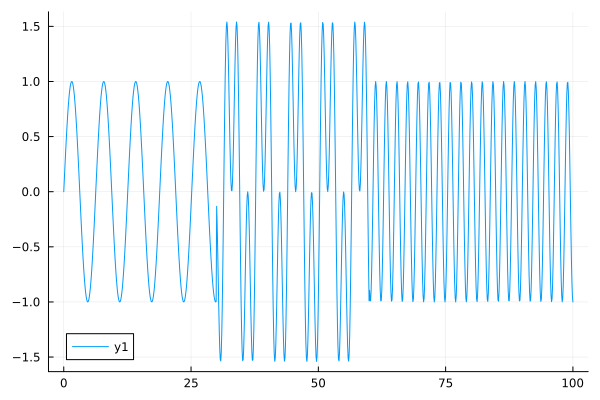

In [1]:
using Plots

# Let's define the time series. We first define the time, then the functions we will use to build it out and finally we build it out.
# For a real scenario, this would be imported from the MIDI file.


t = collect(range(0, stop=100, length=1000)) #Define a time vector
#Functions to define the time series
heavyside(x) = x >= 0 ? 1 : 0 #I'm too lazy to use if and elses in my functions
f(t) = heavyside(60-t)sin(t) + heavyside(t-30)*sin(3*t) #What we use to define the time series. Two pure sines of different frequencies with overlaps between 30 and 60 seconds.

TimeSeries = hcat([t, f.(t)]...) #Define the time series as an array of [time, series]. The hcat weirdness is there so it has a nice format.
plot(TimeSeries[:,1],TimeSeries[:,2]) #We plot this for your beautiful eyes.

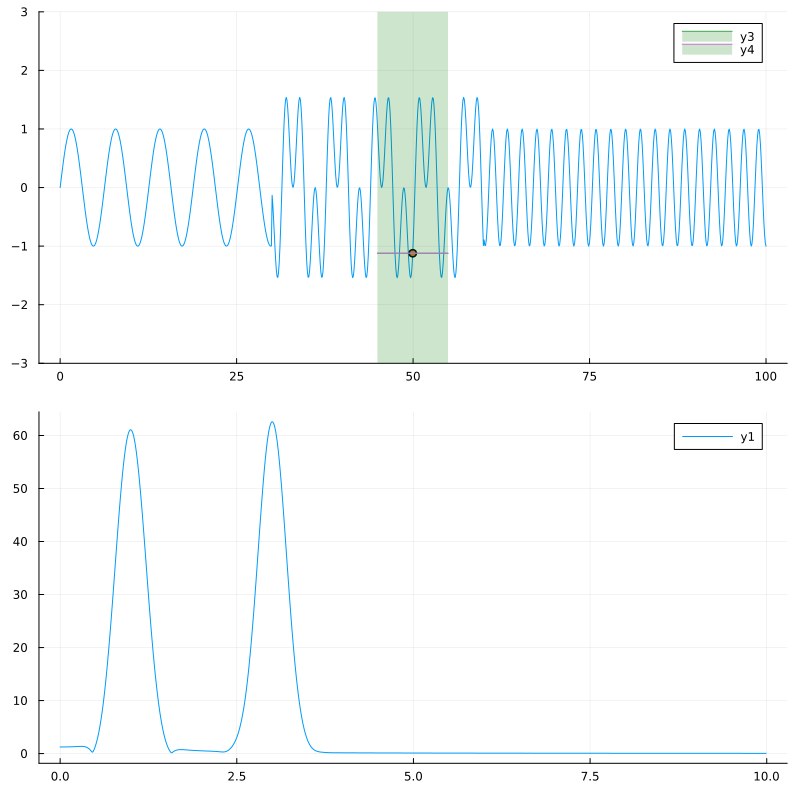

In [7]:

function STFT(time_series,m) # This functions takes a time-series and a discrete time m as inputs and returns the frequencies, the STFT and its spectrum.
    #Making my life easier:
    t = time_series[:,1] #This takes the time from the input (the time series) 
    f_t = time_series[:,2] #This takes the series from the input (not gonna write time series again)
    T= t[end] #The endtime of the time series. This is used to define the standard deviation of the Gaussian window.
    N = length(t) #Length
    ω = 10 * collect(0:N-1)/N #Defines our frequency vector. It's used in the calculations and is one of the outputs.
    dft_result = zeros(Complex{Float64}, N) #Defines an empty vector of complex numbers that store the value of the DFT at a given frequency.
#---------------------------------------------------------------------------------------------------------------------------------------------------------
#Defining our window. We use a gaussian window because we are fancy!
    σ =0.1*T/2 # Standard deviation of the Gaussian window
    window = exp.(-0.5 * ((t .- t[m]) / σ).^2) #Gaussian window. Stolen straight from wikipedia.
    
    f_twind = f_t .* window #Wherein we define the windowed function. It is the function times the window, term by term. Again, from wikipedia.
#---------------------------------------------------------------------------------------------------------------------------------------------------------
# Calculate the DFT.  
    for freq in 1:N #Iterate over the frequencies so we calculate every term in the DFT array.
        for i in 1:N # Sum over the times
            dft_result[freq] += f_twind[i] * exp(-im *ω[freq] * t[i]) # I stole this from wikipedia. It's the DFT formula.
        end
    end
    return ω, dft_result, abs.(dft_result)#Return the frequency, the dft and the absolute value of the dft. Complex numbers are spooky!
end
freq, fourier, spec = STFT(TimeSeries,500)
p1 = plot(TimeSeries[:,1],TimeSeries[:,2],label="",ylimit=(-3,3))
scatter!((TimeSeries[500,1],TimeSeries[500,2]),label="")
plot!([TimeSeries[500,1]-0.05*TimeSeries[end,1],TimeSeries[500,1]+0.05*TimeSeries[end,1]],[TimeSeries[500,2],TimeSeries[500,2]], fillrange=10, fillalpha=0.2,fillcolor=:green)
plot!([TimeSeries[500,1]-0.05*TimeSeries[end,1],TimeSeries[500,1]+0.05*TimeSeries[end,1]],[TimeSeries[500,2],TimeSeries[500,2]], fillrange=-10, fillalpha=0.2, fillcolor=:green)

p2 = plot(freq,spec)
plot(p1,p2,layout=(2,1),size=(800,800))

┌ Info: Saved animation to c:\Users\batti\Documents\Uni\ComputationalProjects\Julia\SSFT\STFT.gif
└ @ Plots C:\Users\batti\.julia\packages\Plots\kLeqV\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\batti\\Documents\\Uni\\ComputationalProjects\\Julia\\SSFT\\STFT.gif")
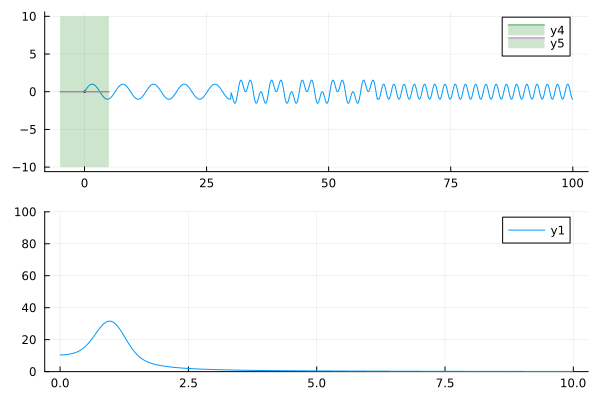

In [3]:
animation= @animate for m in 1:length(t)
    p1 = plot(TimeSeries[:,1],TimeSeries[:,2],label="")
    scatter!((TimeSeries[m,1],TimeSeries[m,2]),label="",markersize=1)
    p2 = plot(STFT(TimeSeries,m)[1],STFT(TimeSeries,m)[3],ylim=(0,100))
    plot(p1,p2,layout=(2,1))
    plot!([TimeSeries[m,1]-0.05*TimeSeries[end,1],TimeSeries[m,1]+0.05*TimeSeries[end,1]],[TimeSeries[m,2],TimeSeries[m,2]], fillrange=10, fillalpha=0.2,fillcolor=:green)
    plot!([TimeSeries[m,1]-0.05*TimeSeries[end,1],TimeSeries[m,1]+0.05*TimeSeries[end,1]],[TimeSeries[m,2],TimeSeries[m,2]], fillrange=-10, fillalpha=0.2, fillcolor=:green)
end
gif(animation, "STFT.gif", fps = 60)

In [11]:
t = collect(range(0, stop=100, length=1000))

1000-element Vector{Float64}:
   0.0
   0.1001001001001001
   0.2002002002002002
   0.3003003003003003
   0.4004004004004004
   0.5005005005005005
   0.6006006006006006
   0.7007007007007007
   0.8008008008008008
   0.9009009009009009
   ⋮
  99.1991991991992
  99.29929929929929
  99.3993993993994
  99.49949949949949
  99.5995995995996
  99.69969969969969
  99.7997997997998
  99.89989989989989
 100.0